# Simplified three plate column

In [101]:
import numpy
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import scipy.optimize
import scipy.integrate

In [102]:
init = [0.1,0.1,0.1,0.1,0.1,0.25,0.25,0.25,0.25,0.25] # initial conditions
α = 1.5

F = 1
xF = 0.5
D = 0.5*F
reflux = 0.8
V = 1

M_star = 0.1 # nominal holdup 
τ = 5
Ltop = 0.3
Lbot = 0.4

In [103]:
def model(t,var):
    xc,x1,x2,x3,xr,Mc,M1,M2,M3,Mr = var
    
    y1 = x1*α/(1+(α-1)*x1)
    xC = y1
    y2 = x2*α/(1+(α-1)*x2)
    y3 = x3*α/(1+(α-1)*x3)
    y4 = xr*α/(1+(α-1)*xr)

#     L0 = reflux*D
#     L1 = Ltop + (M1 - M_star)/τ
#     L2 = Ltop - Lbot + F +(M2 - M_star)/τ
#     L3 = Lbot + (M3 - M_star)/τ

    L0 = reflux*D
    L1 = L0
    L2 = L0 + F
    L3 = L0 + F
    
    V1 = V
    V2 = V
    V3 = V
    V4 = V
    
    B = L3-V4

    dMcdt = V1 - L0 - D
    dxcMcdt = y1*V1 - xc*(L0 + D)
    dxcdt = 1/Mc*(dxcMcdt - xc*dMcdt)

    dM1dt = V2 - V1 + L0 - L1
    dx1M1dt = y2*V2 - y1*V1 + xc*L0 - x1*L1
    dx1dt = 1/M1*(dx1M1dt - x1*dM1dt)

    dM2dt = V3 - V2 + L1 - L2 + F
    dx2M2dt = y3*V3 - y2*V2 + x1*L1 - x2*L2 + xF*F
    dx2dt = 1/M2*(dx2M2dt - x2*dM2dt)

    dM3dt = V4 - V3 + L2 - L3
    dx3M3dt = y4*V4 - y3*V3 + x2*L2 - x3*L3
    dx3dt = 1/M3*(dx3M3dt - x3*dM3dt)

    dMrdt = L3 - V4 - B
    dxrMrdt = x3*L3 - y4*V4 - xr*B
    dxrdt = 1/Mr*(dxrMrdt - xr*dMrdt)
    

    return [dxcdt,dx2dt,dx2dt,dx3dt,dxrdt,dMcdt,dM1dt,dM2dt,dM3dt,dMrdt]


In [108]:
tspan = (0, 100)
t = numpy.linspace( *tspan, 100)
initial_run = scipy.integrate.solve_ivp(model, tspan, init, t_eval=t)

In [109]:
xc,x1,x2,x3,xr,Mc,M1,M2,M3,Mr = initial_run.y

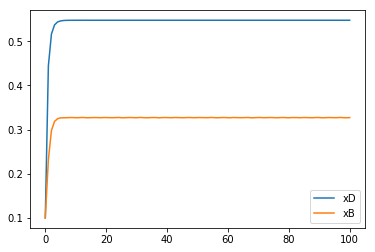

In [112]:
plt.plot(t,xc,label = "xD")
plt.plot(t,xr,label = "xB")
plt.legend()

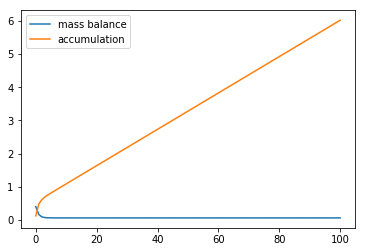

In [111]:
accum = xF*F - xr*B - xc*D
accum1 = xc*Mc+x1*M1+x2*M2+x3*M3+xr*Mr
plt.plot(t,accum,label = "mass balance")
plt.plot(t,accum1,label = "accumulation")
plt.legend()
